In [1]:
#!pip install sklearn

In [5]:
%matplotlib inline

In [4]:
import numpy as np

In [6]:
random_data = np.random.random((20, 2))  # 导入random模块，调用random()函数随机生成[0,1)的实数

In [7]:
random_data

array([[0.80274881, 0.06737027],
       [0.35943925, 0.54404583],
       [0.46469895, 0.30992464],
       [0.77276818, 0.65767388],
       [0.75658657, 0.26630506],
       [0.09497361, 0.89793649],
       [0.73909283, 0.93937197],
       [0.35993002, 0.10854111],
       [0.60038891, 0.73351803],
       [0.7035465 , 0.37278382],
       [0.4300008 , 0.05523696],
       [0.06630428, 0.76724697],
       [0.64984362, 0.45923597],
       [0.77993817, 0.8261721 ],
       [0.89743802, 0.77493554],
       [0.92520242, 0.73416867],
       [0.2718447 , 0.51139296],
       [0.42974585, 0.8294587 ],
       [0.94565686, 0.53751547],
       [0.63109168, 0.60367678]])

In [8]:
import matplotlib.pyplot as plt

# Linear Regression

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [7]:
X = random_data[:, 0] # 输出第0列所有数据

In [8]:
y = random_data[:, 1]

In [9]:
import random

In [10]:
def assmuing_function(x):
    # 在我们的日常生活中是常见的
    # 体重 -> 高血压的概率
    # 收入 -> 买阿玛尼的概率
    # 其实都是一种潜在的函数关系 + 一个随机变化
    return 13.4 * x + 5 + random.randint(-5, 5) # random.randint()生成指定范围内的整数

In [11]:
y = [assmuing_function(x) for x in X]

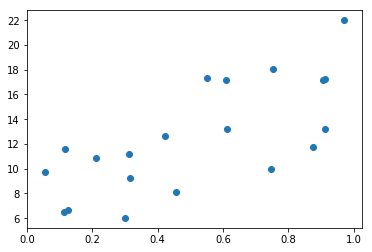

In [12]:
plt.scatter(X, y)

In [13]:
y = np.array(y)

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression().fit(X.reshape(-1, 1), y) #训练数据集   reshape(-1, 1) 变成一列

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit

In [20]:
reg.score(X.reshape(-1, 1), y)  #查看评估的成绩

0.5118097014448598

In [22]:
reg.coef_       # 回归函数x前面的系数w

array([10.1708153])

In [24]:
reg.intercept_    # 截距b

7.259088344704205

In [25]:
def f(x): 
    return reg.coef_ * x + reg.intercept_

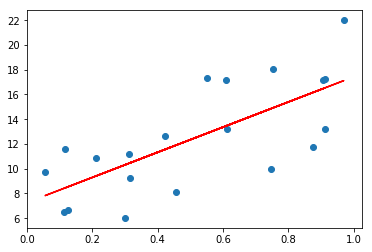

In [26]:
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

In [27]:
reg.predict([[0.3]])

array([10.31033294])

另一种写法

In [45]:
from icecream import ic

In [46]:
def linear_regression(X, y):
    """ Using linear regression model to fit dataset
    
    Fit the dataset on linear regression model provided by sklearn module. 
    Output the training score, training result, visualize the data and return the predict function
    
    Args:
        X: A set of variable x1, x2, x3, ..., xn
        y: A set of dependent variable y1, y2, y3, ..., yn 
    
    Returns:
        predict_func: predict function that accept new x and return predicted value y
    """
    X = np.array(X).reshape(-1, 1) # transfer 1*n array to n*1
    y = np.array(y)
    
    # training
    model = LinearRegression()
    model.fit(X, y)
    
    # training result
    score = model.score(X, y)
    coef = model.coef_[0]
    intercept = model.intercept_
    
    # print the result
    ic(score)
    ic(coef)
    ic(intercept)
    
    # the predict function
    def f(x):
        return coef * x + intercept
    
    # draw the line
    plt.scatter(X, y)
    plt.plot(X, f(X), color='red');
    
    return f

Test the model

In [47]:
# Generate test data
import random
def assuming_function(x):
    # Salary vs cost on foods
    return 0.3 * x + 332 + random.randint(-500, 500)
X = np.random.randint(800, 20000, size=(100))
y = [assuming_function(x) for x in X]

ic| score: 0.9729544084267793
ic| coef: 0.3008289113812377
ic| intercept: 294.54753171041375


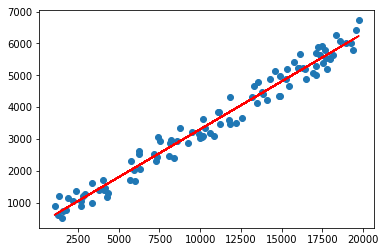

In [48]:
# Testing
predict_func = linear_regression(X, y)

In [49]:
# Predict
predict_func(9000)

3002.007734141553

# KNN模型

In [28]:
def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [29]:
model(X, y)

[(0.11695365523529255, 11.56717898015292),
 (0.31268505067585795, 11.189979679056496),
 (0.751627356960344, 18.07180658326861),
 (0.6124710780500505, 13.207112445870678),
 (0.4229249817864895, 12.66719475593896),
 (0.21317305362511008, 10.856518918576475),
 (0.9688473076792185, 21.982553922901527),
 (0.5500431893545484, 17.37057873735095),
 (0.3015333484446949, 6.040546869158913),
 (0.8745523827693107, 11.719001929108764),
 (0.9106257358976999, 13.20238486102918),
 (0.9117058363926578, 17.216858207661616),
 (0.6096011875491373, 17.16865591315844),
 (0.7457467871863214, 9.993006948296706),
 (0.31556665089388924, 9.228593121978115),
 (0.9051660317928797, 17.12922482602459),
 (0.12528547237468202, 6.678825329820739),
 (0.056034463313847094, 9.750861808405551),
 (0.45599523958356325, 8.110336210419748),
 (0.11504775485282726, 6.541639915027885)]

In [30]:
from scipy.spatial.distance import cosine

In [31]:
def distance(x1, x2):
    return cosine(x1, x2)

In [38]:
def predict(x, k):
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]   #最相似的k个点
    #print (X)
    return most_similars

In [39]:
aa = predict(80, 5)

In [40]:
aa

[(0.7457467871863214, 9.993006948296706),
 (0.11695365523529255, 11.56717898015292),
 (0.751627356960344, 18.07180658326861),
 (0.6124710780500505, 13.207112445870678),
 (0.4229249817864895, 12.66719475593896)]

In [1]:
from collections import Counter

In [44]:
user_counter = Counter(aa) 
user_counter.most_common(1)   


[((0.7457467871863214, 9.993006948296706), 1)]

In [34]:
def average_y(bb):
    sum_point = 0
    for e in bb:
        sum_point += e[1]
    cc = float(sum_point)/ len(bb)    
    return cc

In [35]:
average_y(aa)

10.243475583195067

一种写法：

In [61]:
def knn_regression(X, y):
    """ Using K-Nearest Neighbor model to fit dataset
    
    Fit the dataset on KNN model. 
    Output the predict function
    
    Args:
        X: A set of variable x1, x2, x3, ..., xn
        y: A set of dependent variable y1, y2, y3, ..., yn 
    
    Returns:
        predict_func: predict function that accept new x and return predicted value y
    """
    dataset = np.array([(Xi, yi) for Xi, yi in zip(X, y)])
    
    # x is 1 dimension, so using difference as distance
    def distance(x1, x2):
        return abs(x1 - x2)
    
    def f(x, k=5):
        most_similar = np.array(sorted(dataset, key=lambda xi: distance(xi[0], x))[:k])
        predicted_y = sum(y for _, y in most_similar) / len(most_similar) # using average value to predict the y

        # draw the graph
        plt.scatter(dataset[:, 0], dataset[:, 1])
        plt.scatter(most_similar[:, 0], most_similar[:, 1], color='y')
        plt.scatter(x, predicted_y, color='red')
        
        return predicted_y
    return f

2957.4

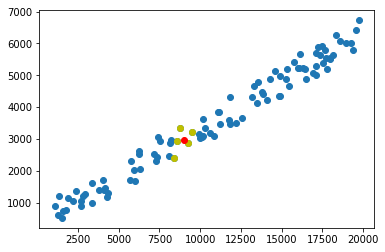

In [72]:
# Using the same data in Linear regression
knn_predict = knn_regression(X, y)
knn_predict(9000)   #取 x=9000

2924.22

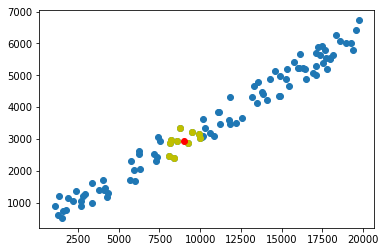

In [52]:
# try k=10
knn_predict(9000, 10)

https://nbviewer.jupyter.org/github/Tianchen627/KKB/blob/master/lesson3/Assignment.ipynb

https://nbviewer.jupyter.org/github/kkb-Alex/kaikeba/blob/master/Assignment-03/Assignment-03.ipynb

# 决策树

   

信息熵 $$Entropy = -\sum_i^n Pr(x_i) log(Pr(x_i))$$

In [12]:
def entropy(elements):  #信息熵：群体的混乱程度
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    return - sum(p * np.log(p) for p in probs)

In [13]:
entropy([1, 1, 1, 1])

-0.0

In [14]:
entropy([1, 1, 1, 0])

0.5623351446188083

In [15]:
entropy([1, 2, 1, 0])

1.0397207708399179

In [16]:
entropy([1,2, 3, 0])

1.3862943611198906

决策树的分割

In [17]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [18]:
import pandas as pd

In [19]:
dataset = pd.DataFrame.from_dict(mock_data)

In [20]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


决策树在选择决策过程、决策顺序的时候，是根据特征进行分割之后，数据的熵最小原则进行的

In [21]:
set(mock_data['family_number'])

{1, 2}

In [22]:
sub_spliter_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()

In [23]:
sub_spliter_1

[1, 1, 0, 0, 0]

In [24]:
sub_spliter_2 = dataset[dataset['family_number'] != 1]['bought'].tolist()

In [25]:
sub_spliter_2

[1, 1]

In [26]:
entropy(sub_spliter_1) + entropy(sub_spliter_2)

0.6730116670092565

In [27]:
sub_spliter_3 = dataset[dataset['gender'] == 'F']['bought'].tolist()

In [28]:
sub_spliter_3

[1, 1, 1, 0]

In [29]:
sub_spliter_4 = dataset[dataset['gender'] != 'F']['bought'].tolist()

In [30]:
sub_spliter_4

[0, 0, 1]

In [31]:
entropy(sub_spliter_3) + entropy(sub_spliter_4)

1.198849312913621

In [32]:
dataset.columns.tolist()

['gender', 'income', 'family_number', 'bought']

In [33]:
#import sys
#print(sys.path)

In [34]:
#!pip install icecream

In [35]:
from icecream import ic

In [36]:
def find_the_min_spliter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    spliter = None
    min_entropy = float('inf')    #正无穷
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_spliter_1)
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_spliter_2)
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    return spliter

In [37]:
find_the_min_spliter(dataset, 'bought')

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 1, 1, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [0, 0, 1]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [0, 0, 1]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [1, 1, 1, 0]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.6730116

spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565


('family_number', 2)

In [38]:
dataset[dataset['family_number'] == 2]

,gender,income,family_number,bought
2,F,+10,2,1
6,M,-10,2,1


In [39]:
dataset[dataset['family_number'] != 2]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [40]:
find_the_min_spliter(dataset[dataset['family_number'] != 2], 'bought')

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [1]
ic| entropy_2: -0.0
ic| entropy_v: 0.5623351446188083
ic| sub_spliter_1: [1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 0, 0, 0]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 0.5623351446188083
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 1, 0]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [0, 0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6365141682948128
ic| sub_spliter_1: [0, 0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 0.6365141682948128
ic| f: 'family_number'
ic| values: {1}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: []
ic| entropy_2: 0
ic| entropy_v: 0.6730116670092565


spliter is: ('income', '-10')
the min entropy is: 0.5623351446188083


('income', '-10')

In [41]:
sub_df = dataset[dataset['family_number'] != 2]

In [42]:
#sub_df

In [43]:
sub_df[sub_df['income'] == '-10']

,gender,income,family_number,bought
1,F,-10,1,1


In [44]:
sub_df[sub_df['income'] != '-10']

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [45]:
find_the_min_spliter(sub_df[sub_df['income'] != '-10'], 'bought')

ic| f: 'income'
ic| values: {'+10'}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 0]
ic| entropy_1: 0.6931471805599453
ic| sub_spliter_2: [0, 0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6931471805599453
ic| sub_spliter_1: [0, 0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 0]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 0.6931471805599453
ic| f: 'family_number'
ic| values: {1}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083


spliter is: ('family_number', 1)
the min entropy is: 0.5623351446188083


('family_number', 1)

# KMeans模型

In [46]:
from sklearn.cluster import KMeans

In [48]:
import random

In [49]:
X = [random.randint(0, 100) for _ in range(100)]
Y = [random.randint(0, 100) for _ in range(100)]

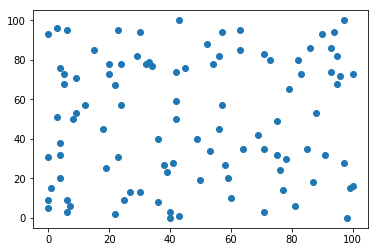

In [50]:
plt.scatter(X, Y)

In [51]:
tranning_data = [[x, y] for x, y in zip(X, Y)]

In [52]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [53]:
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
cluster.cluster_centers_

array([[82.        , 24.35294118],
       [44.41176471, 81.94117647],
       [ 9.86666667, 16.53333333],
       [88.4375    , 78.875     ],
       [45.29411765, 22.82352941],
       [11.5       , 70.33333333]])

In [55]:
cluster.labels_

array([4, 0, 5, 4, 1, 0, 5, 2, 0, 3, 0, 0, 1, 2, 2, 3, 5, 4, 1, 4, 1, 0,
       4, 4, 1, 5, 1, 1, 1, 4, 5, 2, 3, 0, 5, 3, 2, 2, 0, 2, 3, 5, 5, 0,
       5, 4, 3, 1, 4, 1, 2, 3, 2, 0, 3, 3, 3, 3, 3, 1, 5, 5, 5, 5, 4, 1,
       2, 2, 0, 0, 4, 5, 0, 3, 4, 1, 5, 1, 1, 4, 3, 1, 5, 5, 3, 4, 2, 4,
       0, 2, 2, 4, 0, 3, 4, 0, 0, 2, 5, 1])

In [56]:
from collections import defaultdict

In [57]:
centers = defaultdict(list)

In [58]:
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)

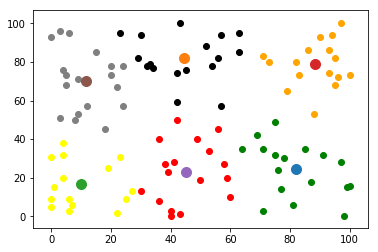

In [59]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)